<a href="https://colab.research.google.com/github/fernandonpa/Admin-Dashboard/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PLANT DISEASE DETECTION SYSTEM**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uom220168r","key":"ed9ed64ca16ef158c169cc5c578fa62c"}'}

### **Set up Kaggle API on Colab**

In [2]:
import os
import json
from pathlib import Path

# Create kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the kaggle directory
!mv kaggle.json /root/.kaggle/

# Set proper permissions
!chmod 600 /root/.kaggle/kaggle.json


### **Download the dataset**

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:16<00:00, 164MB/s]
100% 2.70G/2.70G [00:16<00:00, 174MB/s]


In [4]:
!unzip -q new-plant-diseases-dataset.zip

In [5]:
!rm new-plant-diseases-dataset.zip

### **Import the libraries**

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Data Preprocessing**

In [25]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=256,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=256,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


### **Building the Model**

In [27]:
cnn = tf.keras.models.Sequential()

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [30]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 183s 518ms/step - accuracy: 0.2745 - loss: 2.6589 - val_accuracy: 0.7601 - val_loss: 0.7811
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 135s 410ms/step - accuracy: 0.7353 - loss: 0.8619 - val_accuracy: 0.8292 - val_loss: 0.5484
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 103s 376ms/step - accuracy: 0.8338 - loss: 0.5271 - val_accuracy: 0.8837 - val_loss: 0.3648
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 114s 413ms/step - accuracy: 0.8828 - loss: 0.3683 - val_accuracy: 0.9255 - val_loss: 0.2318
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 104s 377ms/step - accuracy: 0.9123 - loss: 0.2714 - val_accuracy: 0.9310 - val_loss: 0.2101
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 151s 410ms/step - accuracy: 0.9302 - loss: 0.2154 - val_accuracy: 0.9449 - val_loss: 0.1706
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 104s 376ms/step - accuracy: 0.9456 - loss: 0.1673 - val_accuracy: 0.9393 - val_loss: 0.1886
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 103s 373ms/step - accuracy: 0.9514 -

### **Evaluating the Model**

In [33]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

275/275 ━━━━━━━━━━━━━━━━━━━━ 48s 175ms/step - accuracy: 0.9859 - loss: 0.0438
Training accuracy: 0.9874813556671143
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.9572 - loss: 0.1353
Validation accuracy: 0.9568631649017334


In [34]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

### **Save the Model**

In [35]:
cnn.save('trained_plant_disease_model.keras')

### **Accuracy Visualization**

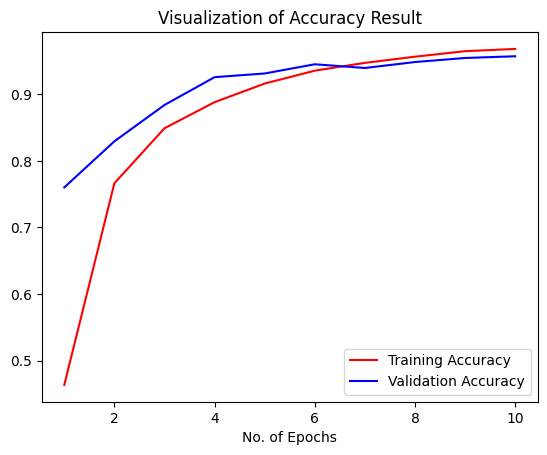

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### **Test for Testset**

In [38]:
model  = tf.keras.models.load_model('trained_plant_disease_model.keras')

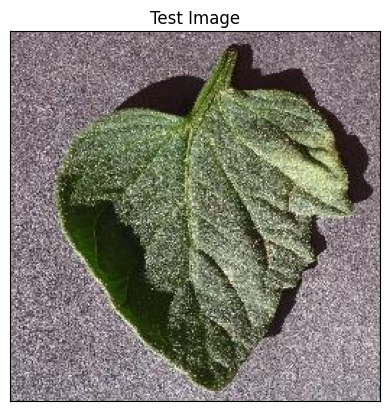

In [39]:
import cv2
image_path = "/content/test/test/TomatoHealthy1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [42]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(array([[1.1826797e-13, 1.0040782e-12, 8.4622885e-16, 1.0875530e-09,
         8.7435467e-15, 1.3907720e-11, 8.9863250e-14, 2.3153715e-13,
         2.8033086e-14, 1.2714454e-15, 8.8130017e-14, 5.0691841e-16,
         5.4860743e-12, 2.6697444e-16, 4.2923741e-16, 2.2298381e-16,
         8.3909311e-15, 4.5033635e-17, 4.6107206e-17, 1.8518846e-14,
         4.0969166e-11, 1.1052420e-13, 6.3048052e-12, 1.9467162e-14,
         4.1728292e-12, 5.8948415e-09, 3.6506849e-14, 2.6210574e-14,
         9.6182954e-17, 8.3746361e-12, 3.5289729e-12, 3.9280539e-13,
         2.8523261e-13, 1.8638530e-12, 3.8710670e-09, 4.7000809e-17,
         2.8405097e-15, 1.0000000e+00]], dtype=float32),
 (1, 38))

In [43]:
result_index = np.argmax(prediction)
result_index

np.int64(37)

In [44]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

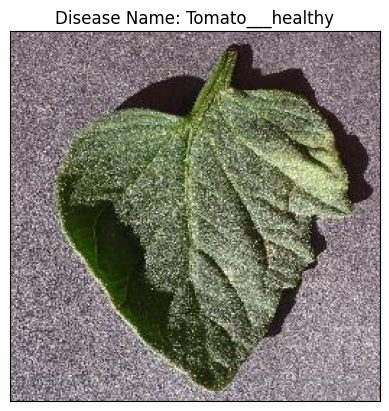

In [45]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()